# Band Structures of the Helical Ladder
In this notebook we calculate the band structure for the helical ladder model as defined in `ladder_hamiltonian.py' for a range of each of the hoppings parameters.

## System setup
First, we set up some system parameters which we will be keeping constant across the various band structure calculations. This includes the lattice parameters $a$ and $b$, the width, and the unit cell size as we are not interested in the band structure folding that occurs for helical systems yet. 

In [14]:
import kwant
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
#from src.ladder_hamiltonian import old_hamiltonian as hamiltonian
from src.ladder_hamiltonian import hamiltonian as hamiltonian

# System parameters
a = 1
b = 1
width = 2
N_phi = 1                       # Unit cell size

# Some default parameters
u0 = 20
t0 = 30
v0 = 20
w0 = 10
phi0 = np.pi/3

# k point grid
kpts = np.linspace(-np.pi/a, np.pi/a, 501)

N_param = 5

## Band structure versus on-site energy $u$
Let's start by examining the effects of adjusting the on-site potential in the Hamiltonian. 

========== Hamiltonian initialized ==========
Lattice constants: a = 1, b = 1
Finite width = 2
Hoppings: u = 10.0, t = 30,              v = 20, w = 10
Twist angle: phi = 0
---------- Hamiltonian matrix ----------
H = 
[[ 10.+0.j -30.-0.j -20.-0.j -15.-0.j]
 [-30.+0.j  10.+0.j -15.-0.j -20.-0.j]
 [-20.+0.j -15.+0.j  10.+0.j   0.+0.j]
 [-15.+0.j -20.+0.j   0.+0.j  10.+0.j]]
H_cell = 
[[ 10.+0.j -30.+0.j]
 [-30.+0.j  10.+0.j]]
H_inter_cell = 
[[-20.+0.j -15.+0.j]
 [-15.+0.j -20.+0.j]]
========== Hamiltonian initialized ==========
Lattice constants: a = 1, b = 1
Finite width = 2
Hoppings: u = 13.75, t = 30,              v = 20, w = 10
Twist angle: phi = 0
---------- Hamiltonian matrix ----------
H = 
[[ 13.75+0.j -30.  -0.j -20.  -0.j -15.  -0.j]
 [-30.  +0.j  13.75+0.j -15.  -0.j -20.  -0.j]
 [-20.  +0.j -15.  +0.j  13.75+0.j   0.  +0.j]
 [-15.  +0.j -20.  +0.j   0.  +0.j  13.75+0.j]]
H_cell = 
[[ 13.75+0.j -30.  +0.j]
 [-30.  +0.j  13.75+0.j]]
H_inter_cell = 
[[-20.+0.j -15.+0.j]
 [-15.+

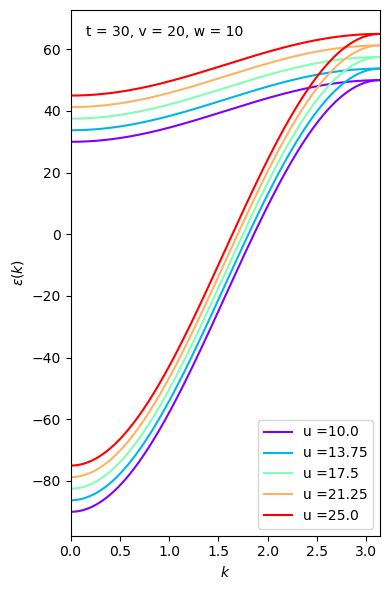

In [15]:
ui = 0.5*u0
uf = 1.25*u0
us = np.linspace(ui, uf, N_param)

# Set up figure
fig, ax = plt.subplots(figsize = (4,6))
colors = iter(cm.rainbow(np.linspace(0,1,N_param)))

# Plot Bandstructure for a range of twist angle
for u in us:
    sys = hamiltonian(hops = (u, t0, v0, w0), output=True).finalized()
    bands = kwant.physics.Bands(sys)
    energies = [bands(k*a) for k in kpts]
    
    color = next(colors)
    ax.plot(kpts, energies, 
            color=color, 
            label='u ='  + str(np.round(u, 3)))
    
# Axis limits, labels
ax.set_xlim(0,np.pi/a)
ax.set_ylabel(r'$\epsilon(k)$')
ax.set_xlabel(r'$k$')
ax.annotate(r't = {}, v = {}, w = {}'
            .format(np.round(t0,3),np.round(v0,3),np.round(w0,3)), 
            xy = (0.05, 0.95), 
            xycoords = 'axes fraction')

# Remove duplicate legend handles
handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
ax.legend(*zip(*unique), loc = 'lower right')
   
plt.tight_layout()
plt.savefig('bands-vs-u.png', dpi=400)
plt.show()

## Band structure versus $t$
Now we examine the effects of varying the hopping along the `rungs' of the ladder.

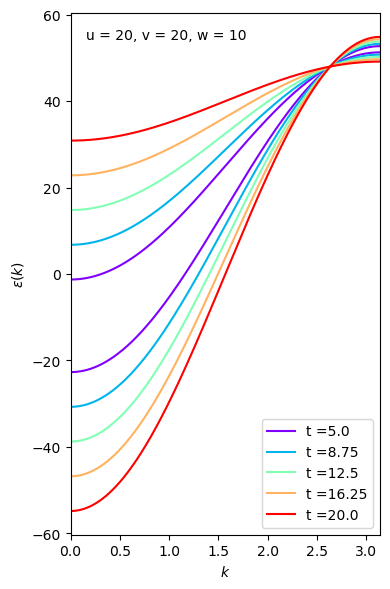

In [16]:
ti = 5
tf = 20 
ts = np.linspace(ti, tf, N_param)

# Set up figure
fig, ax = plt.subplots(figsize = (4,6))
colors = iter(cm.rainbow(np.linspace(0,1,N_param)))

# Plot Bandstructure for a range of twist angle
for t in ts:
    sys = hamiltonian(a, b, width, (u0, t, v0, w0), phi0, N_phi).finalized()
    bands = kwant.physics.Bands(sys)
    energies = [bands(k*a) for k in kpts]
    
    color = next(colors)
    ax.plot(kpts, energies, 
            color=color, 
            label='t ='  + str(np.round(t, 3)))
    
# Axis limits, labels
ax.set_xlim(0,np.pi/a)
ax.set_ylabel(r'$\epsilon(k)$')
ax.set_xlabel(r'$k$')
ax.annotate(r'u = {}, v = {}, w = {}'
            .format(np.round(u0,3),np.round(v0,3),np.round(w0,3)), 
            xy = (0.05, 0.95), 
            xycoords = 'axes fraction')

# Remove duplicate legend handles
handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
ax.legend(*zip(*unique), loc = 'lower right')
   
plt.tight_layout()
plt.savefig('bands-vs-t.png', dpi=400)
plt.show()

## Band structure versus $v$
Next we examine the effect of varying the hopping parameter that controls electrons hopping `up the ladder'. 

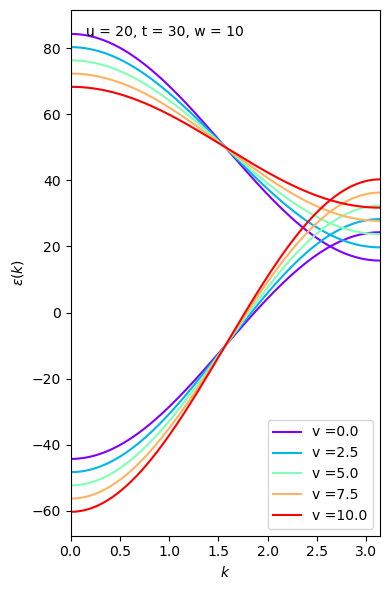

In [17]:
vi = 0
vf = 10
vs = np.linspace(vi, vf, N_param)

# Set up figure
fig, ax = plt.subplots(figsize = (4,6))
colors = iter(cm.rainbow(np.linspace(0,1,N_param)))

# Plot Bandstructure for a range of twist angle,
for v in vs:
    sys = hamiltonian(a, b, width, (u0, t0, v, w0), phi0, N_phi).finalized()
    bands = kwant.physics.Bands(sys)
    energies = [bands(k*a) for k in kpts]
    
    color = next(colors)
    ax.plot(kpts, energies, 
            color=color, 
            label='v ='  + str(np.round(v, 3)))
    
# Axis limits, labels
ax.set_xlim(0,np.pi/a)
ax.set_ylabel(r'$\epsilon(k)$')
ax.set_xlabel(r'$k$')
ax.annotate(r'u = {}, t = {}, w = {}'
            .format(np.round(u0,3),np.round(t0,3),np.round(w0,3)), 
            xy = (0.05, 0.95), 
            xycoords = 'axes fraction')

# Remove duplicate legend handles
handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
ax.legend(*zip(*unique), loc='lower right')
   
plt.tight_layout()
plt.savefig('bands-vs-v.png', dpi=400)
plt.show()

## Band structure versus cross hoppings $w$
Now the band structure as we vary the cross-hopping term $w$.

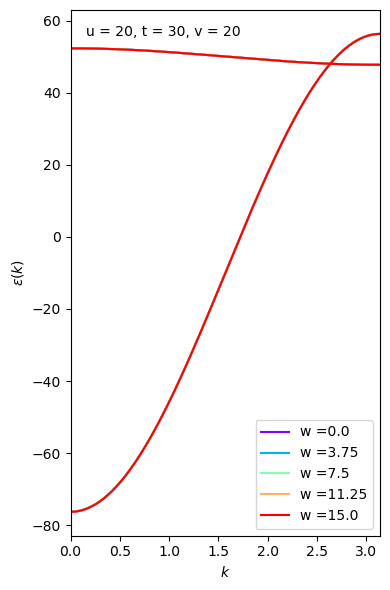

In [18]:
wi = 0
wf = 15
ws = np.linspace(wi, wf, N_param)

# Set up figure
fig, ax = plt.subplots(figsize = (4,6))
colors = iter(cm.rainbow(np.linspace(0,1,N_param)))

# Plot Bandstructure for a range of twist angle,
for w in ws:
    sys = hamiltonian(a, b, width, (u0, t0, v0, w), phi0, N_phi).finalized()
    bands = kwant.physics.Bands(sys)
    energies = [bands(k*a) for k in kpts]
    
    color = next(colors)
    ax.plot(kpts, energies, 
            color=color, 
            label='w ='  + str(np.round(w, 3)))
    
# Axis limits, labels
ax.set_xlim(0,np.pi/a)
ax.set_ylabel(r'$\epsilon(k)$')
ax.set_xlabel(r'$k$')
ax.annotate(r'u = {}, t = {}, v = {}'
            .format(np.round(u0,3),np.round(t0,3),np.round(v0,3)), 
            xy = (0.05, 0.95), 
            xycoords = 'axes fraction')

# Remove duplicate legend handles
handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
ax.legend(*zip(*unique), loc='lower right')
   
plt.tight_layout()
plt.savefig('bands-vs-w.png', dpi=400)
plt.show()